# Bell's Inequality Simulation

### Definitions of States

In this cell, the mathematical definitions of Bell states, density matrices, and mixed states are initialized. Relevant packages are also imported.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

"""
bell states

phi_p = (1/np.sqrt(2)) * np.matrix([[1], 
                                    [0], 
                                    [0], 
                                    [1]])

phi_m = (1/np.sqrt(2)) * np.matrix([[1], 
                                    [0], 
                                    [0], 
                                    [-1]])

psi_p = (1/np.sqrt(2)) * np.matrix([[0], 
                                    [1], 
                                    [1], 
                                    [0]])

psi_m = (1/np.sqrt(2)) * np.matrix([[0], 
                                    [1], 
                                    [-1], 
                                    [0]])
"""

# density matrices for each bell state
rho_phi_p = (1/2) * np.matrix([[1, 0, 0, 1], 
                              [0, 0, 0, 0], 
                              [0, 0, 0, 0], 
                              [1, 0, 0, 1]])

rho_phi_m = (1/2) * np.matrix([[1, 0, 0, -1], 
                              [0, 0, 0, 0], 
                              [0, 0, 0, 0], 
                              [-1, 0, 0, 1]])

rho_psi_p = (1/2) * np.matrix([[0, 0, 0, 0], 
                              [0, 1, 1, 0], 
                              [0, 1, 1, 0], 
                              [0, 0, 0, 0]])

rho_psi_m = (1/2) * np.matrix([[0, 0, 0, 0], 
                              [0, 1, -1, 0], 
                              [0, -1, 1, 0], 
                              [0, 0, 0, 0]])

# mixed states in H, V two particle basis  
# (1/2)( |HH><HH| + |VV><VV|)
mixed_stateVV = (1/2) * np.matrix([[1, 0, 0, 0], 
                                   [0, 0, 0, 0], 
                                   [0, 0, 0, 0], 
                                   [0, 0, 0, 1]])
# (1/2)( |HV><HV| + |VH><VH|)
mixed_stateHV = (1/2) * np.matrix([[0, 0, 0, 0], 
                                   [0, 1, 0, 0], 
                                   [0, 0, 1, 0], 
                                   [0, 0, 0, 0]])
# previous two combined
mixed_state = (1/4) * np.matrix([[1, 0, 0, 0], 
                                 [0, 1, 0, 0], 
                                 [0, 0, 1, 0], 
                                 [0, 0, 0, 1]])

### Projection Operator Functions

In [2]:
# H'H' projection operator function
#inputs: alpha (radians), beta (radians)
#returns: horizontal basis projection operator

def Hprojection(alpha, beta):
   
    Htensor = np.matrix([[np.cos(alpha)*np.cos(beta)], 
                         [np.cos(alpha)*np.sin(beta)], 
                         [np.sin(alpha)*np.cos(beta)], 
                         [np.sin(alpha)*np.sin(beta)]]) 
    
    return Htensor*Htensor.T

#--------------------------------------------------------------------------------------------------------------------------

# V'V' projection operator
#inputs: alpha (radians), beta (radians)
#returns: vertical basis projection operator

def Vprojection(alpha, beta):
    
    Vtensor = np.matrix([[np.sin(alpha)*np.sin(beta)], 
                         [-np.sin(alpha)*np.cos(beta)], 
                         [-np.cos(alpha)*np.sin(beta)], 
                         [np.cos(alpha)*np.cos(beta)]])
    
    return Vtensor*Vtensor.T

### State Generation Functions

In [3]:
# function to generate mixed state using random photon polarization angles
# inputs: n (integer)
# returns: normalized mixed state 

def mixedstate(n):
    projlist = []
    
    for i in range(n):
        angle1 = np.random.uniform(0, 2*np.pi)
        angle2 = np.random.uniform(0, 2*np.pi)
        projlist.append(Vprojection(angle1, angle2))
    
    projsum = (1/n)*sum(projlist)
    
    return projsum

#--------------------------------------------------------------------------------------------------------------------------

# function that creates a mixture of a pure and mixed state
# inputs: n (integer), prob_pure (0 <= num <= 1), prob_mixed (0 <= num <= 1), bell state density matrix from above
# returns: idealized mixed state

def puremixed(n, prob_pure, prob_mixed, rho_bellstate):
    
    mixture = (prob_pure*rho_bellstate + prob_mixed*mixed_state)
    
    return mixture

### Probability Functions

In [4]:
# function that creates theoretical probability distributions when alpha is held constant and beta is rotated
# inputs: alpha (angle, radians), beta (range of angles, radians), bell state density matrix
# returns: list of probabilities

range_ = np.linspace(0, 2*np.pi, num=100)

def probabilityf(alpha, beta, rho_bellstate):
    
    statelist = []
    
    for beta in range_:
        statelist.append(float((Vprojection(alpha, beta)*rho_bellstate).trace()))
    
    return statelist

#--------------------------------------------------------------------------------------------------------------------------

# function that creates experimental probability distribution using inputted probabilities
# no random numbers one angle held constant, the other rotated from 0-2pi
# inputs: prob_pure and prob_mixed (0 <= num <= 1), bell state density matrix, alpha (angle, radians), 
# beta (range of angles, radians)
# returns: list of probabilities 

num = 1

def prob_nonrandom(prob_pure, prob_mixed, rho_bellstate, alpha, beta):
    prob = []
    
    for beta in range_:
        prob.append(float((Vprojection(alpha, beta)*puremixed(num, prob_pure, prob_mixed, rho_bellstate)).trace()))
    
    return prob

#--------------------------------------------------------------------------------------------------------------------------

# uses random numbers to approximate the probabilities from the previous function
# inputs: percent_pure (0 <= num <= 100), bell state density matrix, alpha (angle, radians), 
# beta (range of angles, radians)
# returns: prints experimental visibility, returns list of avg probabilities

def prob_random(percent_pure, rho_bellstate, alpha, beta): 
    trials_per_angle_set = 1000
    avg_prob = []
    
    for beta in range_:
        probability = []
        
        for i in range(trials_per_angle_set):
            rand_num = np.random.uniform(0, 100)
            if rand_num <= percent_pure:
                probability.append(float((Vprojection(alpha, beta)*rho_bellstate).trace()))
            else:
                probability.append(float((Vprojection(alpha, beta)*mixedstate(num)).trace()))
        
        avg_prob.append(np.mean(probability))
    
    pmax = np.max(avg_prob)
    pmin = np.min(avg_prob)
    visibility = (pmax-pmin)/(pmax+pmin)
    print('Visibility: ' + str(visibility))
    
    return avg_prob

#--------------------------------------------------------------------------------------------------------------------------

# same as prob_random but for a single calculation

def randprobcalc(percent_pure, rho_bellstate, alpha, beta):
        probability = []
        
        for i in range(1000):
            rand_num = np.random.uniform(0, 100)
            if rand_num <= percent_pure:
                probability.append(float((Vprojection(alpha, beta)*rho_bellstate).trace()))
            else:
                probability.append(float((Vprojection(alpha, beta)*mixedstate(num)).trace()))
        
        mean = np.mean(probability)
        
        return mean

### Probability of Two-Particle Coincidence Detection Plot

This plot that shows the probability of coincidence detection when one angle (alpha) is held constant and the other (beta) is rotated from 0 to 2pi. Quantities plotted with x's are experimental and calculated through random number generation using the above probability functions and the fits are theoretical and calculated using inputted probabilities.

It is important to verify these functions since they show the probability distribution for certain Bell States (here I used phi- but any of the four can be used) when coincidence detection measurements are made.

Visibility: 0.9994966690860764
Visibility: 0.7230578835926197
Visibility: 0.08492263954424573


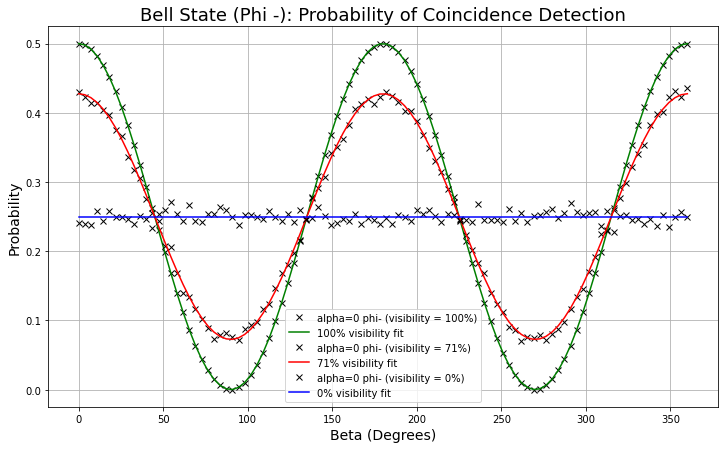

In [10]:
range1_ = np.linspace(0, 360, num=100)        # set range for beta

figw, figh = [12, 7]                          # create figure
fig, ax = plt.subplots(figsize=(figw, figh))

                                              # plot various probability distributions

plot1 = ax.plot(range1_, prob_random(100, rho_phi_m, 0, range_), 'xk', label='alpha=0 phi- (visibility = 100%)')
plot5 = ax.plot(range1_, probabilityf(0, range_, rho_phi_m), '-g', label='100% visibility fit')
#plot2 = ax.plot(range_, prob_nonrandom(0.9, 0.1, rho_phi_m, 0, range_), '-b', label='90% visibility fit')
plot3 = ax.plot(range1_, prob_random(71, rho_phi_m, 0, range_), 'xk', label='alpha=0 phi- (visibility = 71%)')
plot4 = ax.plot(range1_, prob_nonrandom(0.71, 0.29, rho_phi_m, 0, range_), '-r', label='71% visibility fit')
#plot5 = ax.plot(range_, probabilityf(0, range_, rho_phi_m), '-g', label='alpha=0 phi- (visibility = 100%)')
plot6 = ax.plot(range1_, prob_random(0, rho_phi_m, 0, range_), 'xk', label='alpha=0 phi- (visibility = 0%)')
plot7 = ax.plot(range1_, prob_nonrandom(0, 1, rho_phi_m, 0, range_), '-b', label='0% visibility fit')

ax.set_xlabel('Beta (Degrees)', fontsize=14)  # set axes labels, title, grid, and legend
ax.set_ylabel('Probability', fontsize=14)
ax.set_title('Bell State (Phi -): Probability of Coincidence Detection', fontsize=18)
ax.grid(True)
ax.legend(prop={'size': 10})
plt.show()

### Theoretical Functions for E terms and S

In [5]:
# numerical values for each bell state (for the purpose of the functions)

phi_p = 1
psi_m = 2
phi_m = 3
psi_p = 4

#--------------------------------------------------------------------------------------------------------------------------

# function that calculates the theoretical value of an E term for any bell state and a set of angles
# inputs: bell state (from above), alpha (angle, radians), beta (angle, radians)
# returns: resultant E term

def E_theoretical(bellstate, alpha, beta):
    if bellstate == phi_p:
        
        def prob(alpha, beta):
            probability = (1/2)*np.cos(alpha - beta)**2 
            return probability 
    
    if bellstate == psi_m:
        
        def prob(alpha, beta):
            probability = (1/2)*np.sin(alpha - beta)**2
            return probability
    
    if bellstate == phi_m:
        
        def prob(alpha, beta):
            probability = (1/2)*np.cos(alpha + beta)**2 
            return probability
    
    if bellstate == psi_p:
        
        def prob(alpha, beta):
            probability = (1/2)*np.sin(alpha + beta)**2 
            return probability
    
    alpha_perp = alpha + np.radians(90)
    beta_perp = beta + np.radians(90)
    
    E = prob(alpha, beta) + prob(alpha_perp, beta_perp) - prob(alpha_perp, beta) - prob(alpha, beta_perp)
    
    return E

#--------------------------------------------------------------------------------------------------------------------------

# function that calculates the theoretical value of S for any bell state and combination of angles
# inputs: bell state (from above), alpha (angle, radians), delta (parameter, radians)
# returns: absolute value of S

def S_theoretical(bellstate, alpha, delta):
    if bellstate == phi_p:
        
        beta = delta+alpha 
        alpha_prime = 2*delta+alpha 
        beta_prime = np.pi/2-delta+alpha
    
    if bellstate == psi_m:
        
        beta = delta+alpha 
        alpha_prime = 2*delta+alpha 
        beta_prime = np.pi/2-delta+alpha
    
    if bellstate == phi_m:
        
        beta = delta-alpha 
        alpha_prime = 2*delta-alpha 
        beta_prime = np.pi/2-delta-alpha
    
    if bellstate == psi_p:
        
        beta = delta-alpha 
        alpha_prime = 2*delta-alpha 
        beta_prime = np.pi/2-delta-alpha
    
    term1 = E_theoretical(bellstate, alpha, beta)
    term2 = E_theoretical(bellstate, alpha, beta_prime)
    term3 = E_theoretical(bellstate, alpha_prime, beta)
    term4 = E_theoretical(bellstate, alpha_prime, beta_prime)
    
    S = term1 - term2 + term3 + term4
    
    return abs(S)

### S vs. Delta Plot

This graph allows the all combinations of angles that give maximum values of S to be calculated.

Max value phi+: 2.828424501056636
Max value phi-: 2.828424501056636


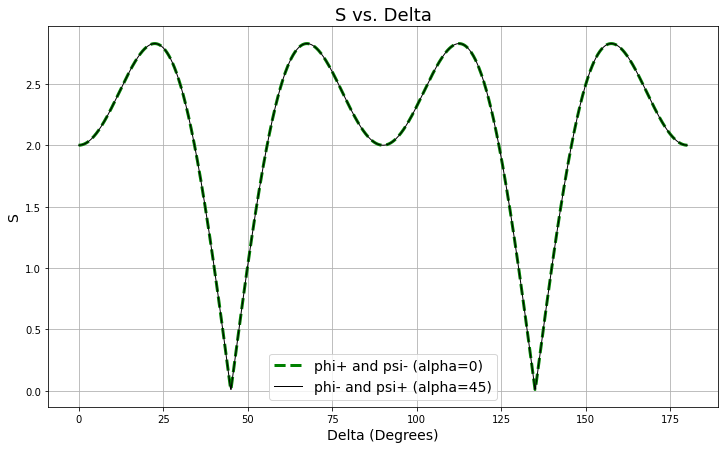

In [11]:
range1 = np.linspace(0, np.pi, num=1000)  # set ranges
range2 = np.linspace(0, 180, num=1000)

list1 = []                                # calculate S for each range
for delta in range1:
    list1.append(S_theoretical(phi_p, np.radians(0), delta))

list2 = []
for delta in range1:
    list2.append(S_theoretical(phi_m, np.radians(45), delta))  

print('Max value phi+: ' + str(np.max(list1)))  # print the maximum values (in order to verify violations)
print('Max value phi-: ' + str(np.max(list2)))

figw, figh = [12, 7]                            # initialize plot, plot distributions, set labels and legend
fig, ax = plt.subplots(figsize=(figw, figh))

#plot2 = ax.plot(range2, list2, '-k', linewidth=2, label='phi- and psi+ (alpha=45)')
plot1 = ax.plot(range2, list1, '--g', linewidth=3, label='phi+ and psi- (alpha=0)')
plot2 = ax.plot(range2, list2, '-k', linewidth=1, label='phi- and psi+ (alpha=45)')
ax.set_xlabel('Delta (Degrees)', fontsize=14)
ax.set_ylabel('S', fontsize=14)
ax.set_title('S vs. Delta', fontsize=18)
ax.grid(True)
ax.legend(prop={'size': 14})
plt.show()

### Experimental Functions for E terms and S

In [8]:
# numerical values for each bell state (for the purpose of the functions)

phi_p = 1
psi_m = 2
phi_m = 3
psi_p = 4

#--------------------------------------------------------------------------------------------------------------------------

# function that calculates an E term using random numbers for any bell state and combination of angles
# inputs: percent_pure (0 <= num <= 100), bell state density matrix, alpha (angle, radians), 
# beta (angle, radians) 
# returns: E term

def E(percent_pure, rho_bellstate, alpha, beta):
    alpha_perp = alpha + np.radians(90)
    beta_perp = beta + np.radians(90)
    
    Pvv1 = randprobcalc(percent_pure, rho_bellstate, alpha, beta)
    Pvv2 = randprobcalc(percent_pure, rho_bellstate, alpha_perp, beta_perp)
    Pvv3 = randprobcalc(percent_pure, rho_bellstate, alpha_perp, beta) 
    Pvv4 = randprobcalc(percent_pure, rho_bellstate, alpha, beta_perp)
    
    E = Pvv1 + Pvv2 - Pvv3 - Pvv4
    
    return E

#--------------------------------------------------------------------------------------------------------------------------

# function that calculates the S parameter for any bell state and combination of angles using random numbers
# inputs: percent_pure (0 <= num <= 100), bell state (from above), bell state density matrix, alpha (angle, radians), 
# beta (angle, radians) 
# returns: absolute value of S

def S(percent_pure, bellstate, rho_bellstate, alpha, delta):
    if bellstate == phi_p:
        
        beta = delta+alpha 
        alpha_prime = 2*delta+alpha 
        beta_prime = np.pi/2-delta+alpha
    
    if bellstate == psi_m:
        
        beta = delta+alpha 
        alpha_prime = 2*delta+alpha 
        beta_prime = np.pi/2-delta+alpha
    
    if bellstate == phi_m:
        
        beta = delta-alpha 
        alpha_prime = 2*delta-alpha 
        beta_prime = np.pi/2-delta-alpha
    
    if bellstate == psi_p:
        
        beta = delta-alpha 
        alpha_prime = 2*delta-alpha 
        beta_prime = np.pi/2-delta-alpha
    
    E1 = E(percent_pure, rho_bellstate, alpha, beta) 
    E2 = E(percent_pure, rho_bellstate, alpha, beta_prime)
    E3 = E(percent_pure, rho_bellstate, alpha_prime, beta) 
    E4 = E(percent_pure, rho_bellstate, alpha_prime, beta_prime)
    
    S = E1 - E2 + E3 + E4
    
    return abs(S)

### S vs. Delta Plot (Experimental Distributions) 

This plot compares the values of S of phi+ and the mixed state for different delta. 

Notice how S goes above 2 for 100% and 90% visibilities, barely goes above 2 for 71% visibility, and reaches a maximum of 2 for the classical mixed state. This is a clear demonstration of how the CHSH Inequality is violated for quantum states, which are entangled, and not violated for classical states, which are not entangled.

Max S value phi+: 2.8283096599849964
Max S value phi+ (visibility = 90%): 2.5665586032912735
Max S value phi+ (visibility = 71%): 2.0247613881344453
Max S value mixed state: 2.0


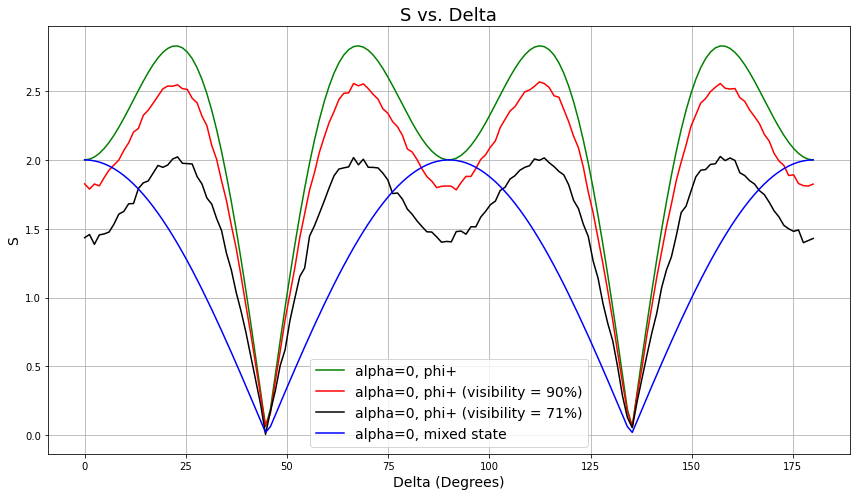

In [10]:
range1 = np.linspace(0, np.pi, num=150)                               # set ranges
range2 = np.linspace(0, 180, num=150)

list1 = []
for delta in range1:
    list1.append(S_theoretical(phi_p, np.radians(0), delta))          # calulate 4 S distributions 

list2 = []
for delta in range1:
    list2.append(S(90, phi_p, rho_phi_p, np.radians(0), delta))

list3 = []
for delta in range1:
    list3.append(S(71, phi_p, rho_phi_p, np.radians(0), delta))

list4 = []
for delta in range1:
    list4.append(S(100, phi_p, mixed_stateVV, np.radians(0), delta))

print('Max S value phi+: ' + str(np.max(list1)))                      # print the maximum value of each distribution
print('Max S value phi+ (visibility = 90%): ' + str(np.max(list2)))
print('Max S value phi+ (visibility = 71%): ' + str(np.max(list3)))
print('Max S value mixed state: ' + str(np.max(list4)))

figw, figh = [12, 7]                                                  # initialize figure, plot distributions, set axes
fig, ax = plt.subplots(figsize=(figw, figh), tight_layout=True)       # labels and legend

plot1 = ax.plot(range2, list1, '-g', label='alpha=0, phi+')
plot2 = ax.plot(range2, list2, '-r', label='alpha=0, phi+ (visibility = 90%)')
plot3 = ax.plot(range2, list3, '-k', label='alpha=0, phi+ (visibility = 71%)')
plot4 = ax.plot(range2, list4, '-b', label='alpha=0, mixed state')
ax.set_xlabel('Delta (Degrees)', fontsize=14)
ax.set_ylabel('S', fontsize=14)
ax.set_title('S vs. Delta', fontsize=18)
ax.grid(True)
ax.legend(prop={'size': 14})
plt.show()

### Calulation of Minimum Visibility Needed for a Violation

It is extremely important to find the minimum visibility needed for a violation to ensure that the physical experiment is conducted properly and produces the correct results.

If the experimental equipment is poor (anywhere below 71% visibility) a quantum entangled Bell State will not be observed (even if it is being properly created) and no violation of S will be seen.

Linear fit parameters, Linear Fit:
a = -1.0114e-02 +/- 4.7150e-03 
b = 2.8429e-02 +/- 8.1463e-05 


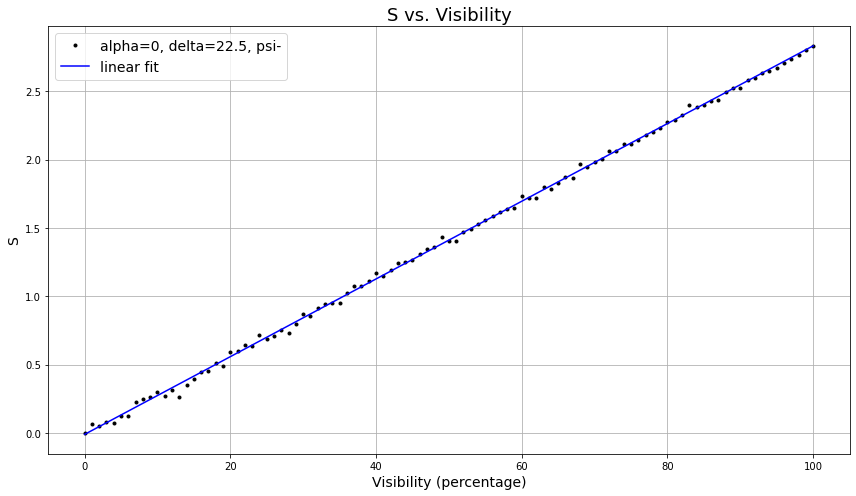

In [18]:
range1 = np.arange(0, 101)   # set range

def linearfit(x, a, b):      # define linear fit function
    return a + b*x

list1 = []                   # calculate S distribution for each percent visibility
for i in range1:
    list1.append(S(i, psi_m, rho_psi_m, np.radians(0), np.radians(22.5)))
    
# print ("Coordinates: ") 
# for percent, Svalue in zip(range(len(array1)), array1): 
#     print (percent, Svalue)

poptstring = ['a','b']      # define fit parameters and matrices
datastring = ['Linear Fit']

popt = [np.zeros(2)]
pcov = [np.zeros((2,2))]

popt, pcov = curve_fit(linearfit, range1, list1, p0=[0.005,0.0282])   # fit a line to the data

print('Linear fit parameters, {:s}:'.format(datastring[0]))           # print fit parameters in a visually appealing way
for i in np.arange(len(popt)):
    print('{:s} = {:010.4e} +/- {:06.4e} '.format(poptstring[i],popt[i],pcov[i,i]**0.5))
    
figw, figh = [12, 7]                                                  # initialize figure, plot points and linear fit
fig, ax = plt.subplots(figsize=(figw, figh), tight_layout=True)       # set axes labels and legend

plot1 = ax.plot(range1, list1, '.k', label='alpha=0, delta=22.5, psi-')
plot2 = ax.plot(range1, linearfit(range1,popt[0],popt[1]), '-b', label='linear fit' )
ax.set_xlabel('Visibility (percentage)', fontsize=14)
ax.set_ylabel('S', fontsize=14)
ax.set_title('S vs. Visibility', fontsize=18)
ax.grid(True)
ax.legend(prop={'size': 14})
plt.show()